In [ ]:
!pip install pandas-market-calendars holidays

Enter the stock symbol / ticker symbol of your preferred stock (e.g. MSFT): TGT
Enter the starting date (YYYY-MM-DD format): 2020-01-01
Enter the ending date (YYYY-MM-DD format): 2023-01-01


2020-01-01 is a weekend or New Year's Day. Please re-enter.


Enter the starting date (YYYY-MM-DD format): 2022-02-14
Enter the ending date (YYYY-MM-DD format): 2024-05-16


[*********************100%***********************]  1 of 1 completed



Price            Close        High         Low        Open    Volume
Ticker             TGT         TGT         TGT         TGT       TGT
Date                                                                
2022-02-14  186.347870  188.965686  183.792589  188.688717   4066700
2022-02-15  185.908203  187.828496  184.669901  187.828496   4739300
2022-02-16  186.473495  187.406723  183.772547  185.638988   3340600
2022-02-17  183.054657  185.701768  182.938000  185.378730   3865900
2022-02-18  183.404633  185.414650  182.588062  183.521289   3321700
2022-02-22  176.190109  182.318839  174.530049  181.825320   5621300
2022-02-23  170.402359  177.554055  170.142140  176.683647   4471300
2022-02-24  171.882935  172.071366  165.108115  165.547810   3917700
2022-02-25  178.765442  179.016692  171.676566  171.847046   4098500
2022-02-28  179.258987  180.524208  175.732486  177.096426   6192200
2022-03-01  196.900452  203.782962  196.110813  203.540679  15776100
2022-03-02  201.808792  202.90353

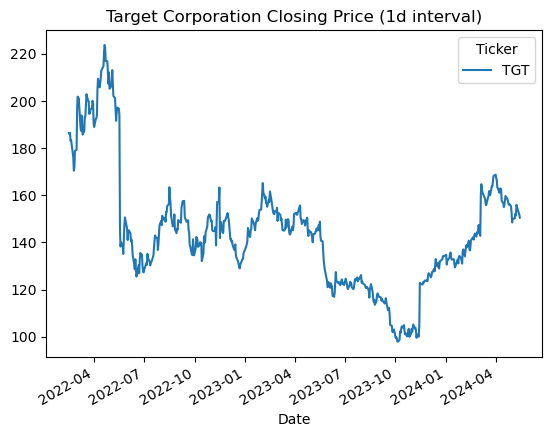

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_market_calendars as mcal
from datetime import datetime, timedelta
import holidays

nyse = mcal.get_calendar("NYSE")
us_holidays = holidays.UnitedStates()

def next_trading_day(date_str):
    date = datetime.strptime(date_str, "%Y-%m-%d")
    while date.weekday() >= 5:
        date += timedelta(days=1)
    return date.strftime("%Y-%m-%d")
    
def dateconvert(date):
    year, month, day = map(int, date.split("-"))
    return year, month, day

while True:
    ticker = input("Enter the stock symbol / ticker symbol of your preferred stock (e.g. MSFT):")
    if not ticker.replace(".", "").isalnum():
        print("Ticker should only contain letters.")
        continue
    try:
        ticker_fullname = yf.Ticker(ticker).info.get("longName")
        if not ticker_fullname:
            print("Ticker not found. Try again.")
            continue
    except Exception:
        print("Ticker not found. Try again.")
        continue
    break

while True:
    start_date = input("Enter the starting date (YYYY-MM-DD format):")
    end_date = input("Enter the ending date (YYYY-MM-DD format):")
    try:
        syear, smonth, sdate = dateconvert(start_date)
        eyear, emonth, edate = dateconvert(end_date)
    except ValueError:
        print("Invalid date format; use YYYY-MM-DD.")
        continue
    start_dt = datetime.strptime(start_date, "%Y-%m-%d")
    if start_dt.weekday() >= 5 or start_dt in us_holidays:
        print(f"{start_date} is a weekend or {us_holidays.get(start_dt, 'holiday')}. Please re-enter.")
        continue
    end_dt = datetime.strptime(end_date, "%Y-%m-%d")
    if start_dt == end_dt:
        print("Starting date and ending date cannot be the same.")
        continue
    break

days_gap = (end_dt - start_dt).days

min_rows = 5
max_rows = 15
rownum = min(max(min_rows, int(days_gap ** 0.5)), max_rows)

if start_dt >= end_dt:
    end_dt = start_dt + timedelta(days=1)
    end_date = end_dt.strftime("%Y-%m-%d")

interval = "1h" if days_gap < 5 and (datetime.now() - start_dt).days <= 730 else "1d"

print()

data = yf.download(ticker, start=start_date, end=end_date, interval=interval, auto_adjust=True)
if data.empty:
    print("No data found for the given date range.")
else:
    print()
    print(data.head(rownum))
    print()
    print(data.tail(rownum))
    print()
    data['Close'].plot(title=f"{ticker_fullname} Closing Price ({interval} interval)")
    plt.show()

## Day 1 (8/19/2025): Stock Price Visualization

**GOAL(S):**
- Create a stock price visualization tool that can be used with user-inputted ticker symbols and start/end dates for data analysis. The data will be visualized through data tables and graphs.

**COMPLETED TASK(S):**
- Created a proper input system for the ticker symbol
- Created a proper input system for the start/end date
- Coded a solution for errors in start/end date format
- Print two data tables for the first 10 days and last 10 days, which include columns for stock analysis
- Graph the closing price with an automatically adjusted scale depending on date disparity

**FIX(ES) NEEDED / NEXT GOAL(S):**
- Dates outside the range of the start/end date cause the program to break
- Short date ranges (within 10 days) cause issues with the tables and graph



## Day 2 (8/20/2025): Stock Price Visualization

**GOAL(S):**
- Fix issues in the previous program, while adding new features such as error messages for invalid starting dates (holidays, weekends)

**COMPLETED TASK(S):**
- Import tools to check for holiday/weekend, and prevent starting dates from being a holiday/weekend
- Coded a solution for errors when the starting date and ending date are the same
- Coded a solution for non-alphabetical inputs for the ticker (excluding "." and "")
- Date ranges under 5 days and within 730 days from the current date will have an interval of 1 hour
- Row numbers in the table change depending on the date range
- Error message for empty data returns

**FIX(ES) NEEDED / NEXT GOAL(S):**
- Create comparison options and multivariable graphs
- End date holiday/weekend checks may be optimal for this program
- Date and time are creating issues within the graphs
- Data for date ranges less than 5 days and more than 730 days old from the current date is very lackluster



## Day 3 (): Stock Price Visualization

**GOAL(S):**
- 

**COMPLETED TASK(S):**
- 

**FIX(ES) NEEDED / NEXT GOAL(S):**
-